# Regression methods demo

#### Notebook showing predictions and dependencies of regression methods from major parameters.

### Author: Victor Kitov
v.v.kitov(at)yandex.ru

In [1]:
%pylab inline
%precision 6

Populating the interactive namespace from numpy and matplotlib


'%.6f'

In [2]:
import numpy as np
from numpy import *
np.set_printoptions(linewidth=140,    # reserve wide area for text output 
                    edgeitems=10)     # show more elements at the beginning and the end of numpy arrays
rcParams['figure.figsize'] = (6.0, 3.5)  # default matplotlib figure size

In [3]:
import sklearn as skl
import pandas as pd
from pdb import set_trace as bp

In [4]:
import bokeh
from bokeh.models import BasicTicker, ColorBar, ColumnDataSource, LinearColorMapper, PrintfTickFormatter, FactorRange, Range1d, ColorBar
from bokeh.transform import transform, linear_cmap, factor_cmap, factor_mark, jitter
from bokeh.plotting import figure, output_file, output_notebook, show
from bokeh.colors import RGB # RGB(r,g,b) - convenient way to define a color in Bokeh
from bokeh.palettes import Spectral6, Viridis256
from bokeh.io import show, output_file
from bokeh.core.properties import value
from bokeh.util.hex import hexbin
from bokeh.layouts import column,row,gridplot

from common.visualize.method import plot_predictions_2D, show_param_dependency  # use https://github.com/Apogentus/common

In [5]:
output_notebook()  

Loading BokehJS ...

In [6]:
from functools import partial  # allows calling function with prespecified parameters
figure = partial(figure, plot_width=350, plot_height=350) # now all fugures will have default 350x350 size (if not redefined)

In [7]:
N=500
X=randn(N,2)
Y=X[:,0]-X[:,1]+2*X[:,0]*X[:,1]*(X[:,0]>0)*(X[:,1]>0)+randn(N)

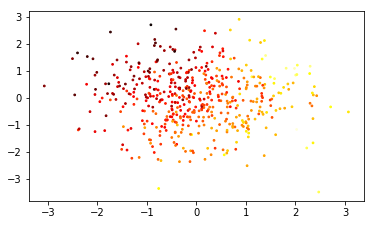

In [8]:
scatter(X[:,0], X[:,1], c=Y, cmap='hot', s=3)

In [9]:
X_train=X[::2]
Y_train=Y[::2]

X_test=X[1::2]
Y_test=Y[1::2]

### K-NN

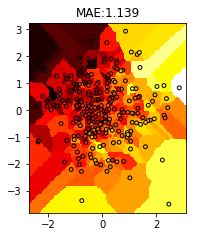

In [10]:
from sklearn.neighbors import KNeighborsRegressor

# n_neighbors: 1,3,20,100
# p: 1,2,10
m = KNeighborsRegressor(n_neighbors=1,p=20)
m.fit(X_train,Y_train)
Y_hat = m.predict(X_test)
MAE = mean(abs(Y_hat-Y_test))
plot_predictions_2D(m, X_train, Y_train, task='regression', train=False, title='MAE:%.3f'%MAE)

0| 4| 8| 12| 16| 20| 24| 28| 32| 36| 40| 44| 48| 52| 56| 60| 64| 68| 72| 76| 80| 84| 88| 92| 96| 100| 
Min MAE = 0.8558 for n_neighbors=8


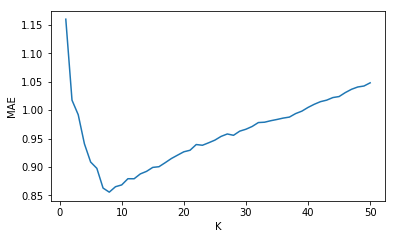

In [11]:
m = KNeighborsRegressor(n_neighbors=1,p=2)
show_param_dependency(m, X_train, Y_train, X_test, Y_test, param_name='n_neighbors', loss_fun='MAE',
                      param_vals=arange(1,51,1), x_label='K')

# Ridge regression

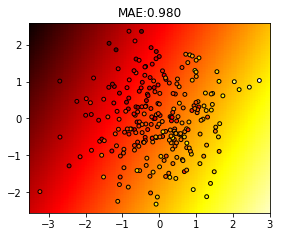

In [43]:
from sklearn.linear_model import Ridge

# alpha: 0.001, 0.5, 50, 1000
m = Ridge(alpha = 0.0000005)
m.fit(X_train,Y_train)
Y_hat = m.predict(X_test)
MAE = mean(abs(Y_hat-Y_test))
plot_predictions_2D(m, X_train, Y_train, task='regression', train=False, title='MAE:%.3f'%MAE)

In [44]:
m.coef_

array([ 1.442699, -0.83804 ])

0| 4| 8| 12| 16| 20| 24| 28| 32| 36| 40| 44| 48| 52| 56| 60| 64| 68| 72| 76| 80| 84| 88| 92| 96| 100| 
Min MAE = 0.8530 for n_neighbors=16


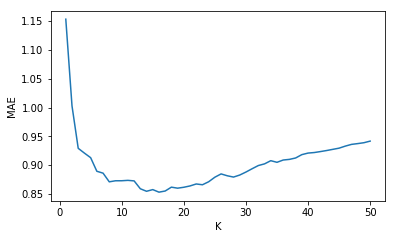

In [62]:
m = KNeighborsRegressor(n_neighbors=1,p=2)
show_param_dependency(m, X_train, Y_train, X_test, Y_test, param_name='n_neighbors', loss_fun='MAE',
                      param_vals=arange(1,51,1), x_label='K')

# LASSO regression

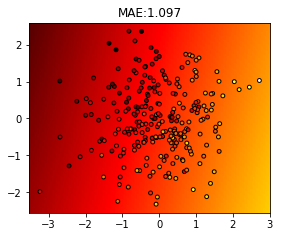

In [63]:
from sklearn.linear_model import Lasso

# alpha: 0.001, 0.5, 50, 1000
m = Lasso(alpha = 0.5)
m.fit(X_train,Y_train)
Y_hat = m.predict(X_test)
MAE = mean(abs(Y_hat-Y_test))
plot_predictions_2D(m, X_train, Y_train, task='regression', train=False, title='MAE:%.3f'%MAE)

In [64]:
m.coef_

array([ 0.875223, -0.261149])

0| 12| 25| 38| 50| 62| 75| 88| 100| 
Min MAE = 0.9798 for alpha=0.001


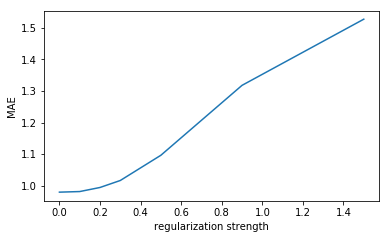

In [68]:
m = Lasso(alpha = 0.5)
show_param_dependency(m, X_train, Y_train, X_test, Y_test, param_name='alpha', loss_fun='MAE',
                      param_vals=[0.001,0.1,0.2,0.3,0.5,0.9,1.5], x_label='regularization strength')

# Kernel ridge regression

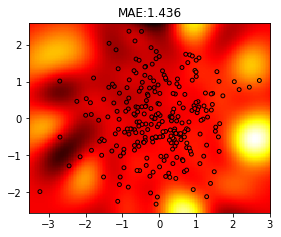

In [71]:
from sklearn.kernel_ridge import KernelRidge

# kernel='poly', degree=1,2,5
# kernel='rbf', gamma=0.1, 1, 5, 10
m = KernelRidge(alpha=0.0001, kernel='rbf', gamma=1, degree=8) # linear, poly, rbf

m.fit(X_train,Y_train)
Y_hat = m.predict(X_test)
MAE = mean(abs(Y_hat-Y_test))
plot_predictions_2D(m, X_train, Y_train, task='regression', train=False, title='MAE:%.3f'%MAE)

0| 14| 29| 43| 57| 71| 86| 100| 
Min MAE = 1.0147 for alpha=0.5


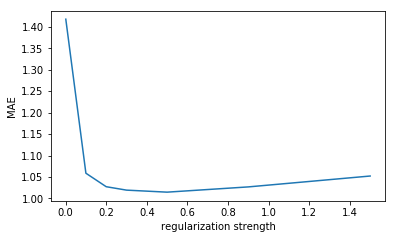

In [73]:
m = KernelRidge(alpha=0.0001, kernel='rbf', gamma=10, degree=8) # linear, poly, rbf

show_param_dependency(m, X_train, Y_train, X_test, Y_test, param_name='alpha', loss_fun='MAE',
                      param_vals=[0.001,0.1,0.2,0.3,0.5,0.9,1.5], x_label='regularization strength')

# Decision tree

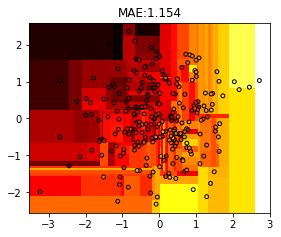

In [48]:
from sklearn.tree import DecisionTreeRegressor

m = DecisionTreeRegressor(max_depth=20)
m.fit(X_train,Y_train)
Y_hat = m.predict(X_test)
MAE = mean(abs(Y_hat-Y_test))
plot_predictions_2D(m, X_train, Y_train, task='regression', train=False, title='MAE:%.3f'%MAE)

In [49]:
m.feature_importances_ 

array([0.682462, 0.317538])

0| 4| 8| 12| 16| 20| 24| 27| 31| 35| 39| 43| 47| 51| 55| 59| 63| 67| 71| 75| 78| 82| 86| 90| 94| 98| 100| 
Min MAE = 0.9934 for max_depth=5.9


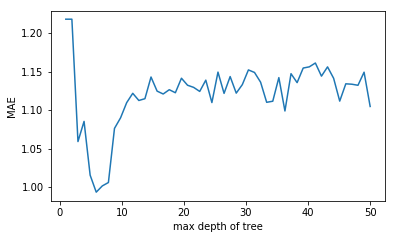

In [50]:
show_param_dependency(m, X_train, Y_train, X_test, Y_test, param_name='max_depth', loss_fun='MAE',
                      param_vals=linspace(1,50,51), x_label='max depth of tree')

### RandomForestRegressor

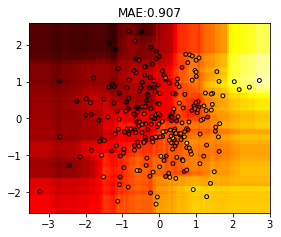

In [51]:
from sklearn.ensemble import RandomForestRegressor

# criterion: mae,mse
m = RandomForestRegressor(max_features=0.91, n_estimators=20, bootstrap=True, criterion='mae')  
m.fit(X_train,Y_train)
Y_hat = m.predict(X_test)
MAE = mean(abs(Y_hat-Y_test))
plot_predictions_2D(m, X_train, Y_train, task='regression', train=False, title='MAE:%.3f'%MAE)

In [25]:
m.feature_importances_ 

array([0.570784, 0.429216])

0| 4| 9| 13| 17| 21| 26| 30| 34| 39| 43| 47| 51| 56| 60| 64| 69| 73| 77| 81| 86| 90| 94| 99| 100| 
Min MAE = 0.8657 for n_estimators=17


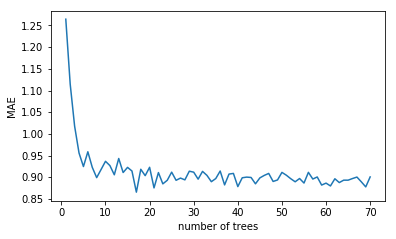

In [77]:
m = RandomForestRegressor(max_features=0.5, n_estimators=20, bootstrap=True, criterion='mae')  
show_param_dependency(m, X_train, Y_train, X_test, Y_test, param_name='n_estimators', loss_fun='MAE',
                      param_vals=arange(1,71,1), x_label='number of trees')

# Boosting

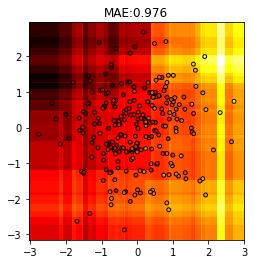

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

# n_estimators: 1,3,5, 100,500
# learning_rate: 1, 0.1, 0.01
# loss: ls, lad
m = GradientBoostingRegressor(n_estimators=300, learning_rate=1,  max_depth=2, loss='lad')
m.fit(X_train,Y_train)
Y_hat = m.predict(X_test)
MAE = mean(abs(Y_hat-Y_test))
plot_predictions_2D(m, X_train, Y_train, task='regression', train=False, title='MAE:%.3f'%MAE)

In [22]:
m.feature_importances_ 

array([0.761727, 0.238273])

0| 4| 8| 12| 17| 21| 25| 29| 33| 38| 42| 46| 50| 54| 58| 62| 67| 71| 75| 79| 83| 88| 92| 96| 100| 
Min MAE = 0.8990 for n_estimators=10


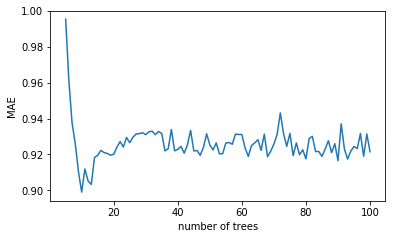

In [84]:
m = GradientBoostingRegressor(n_estimators=100, learning_rate=0.3,  max_depth=2, loss='lad') 
show_param_dependency(m, X_train, Y_train, X_test, Y_test, param_name='n_estimators', loss_fun='MAE',
                      param_vals=arange(5,101,1), x_label='number of trees')

# MLP

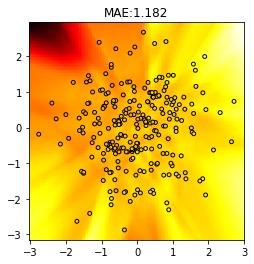

In [23]:
from sklearn.neural_network import MLPRegressor

# solver: sgd, lbfgs, adam
# hidden_layer_sizes: [4],[40],[400],[190,120],[190,12]
# activation: identity, logistic, tanh, relu
m = MLPRegressor(hidden_layer_sizes=[190,12], alpha=0.01, max_iter=1000, 
                 solver='lbfgs', activation='relu')

m.fit(X_train,Y_train)
Y_hat = m.predict(X_test)
MAE = mean(abs(Y_hat-Y_test))
plot_predictions_2D(m, X_train, Y_train, task='regression', train=False, title='MAE:%.3f'%MAE)

0| 10| 20| 30| 40| 50| 60| 70| 80| 90| 100| 
Min MAE = 0.8755 for alpha=11.200000000000001


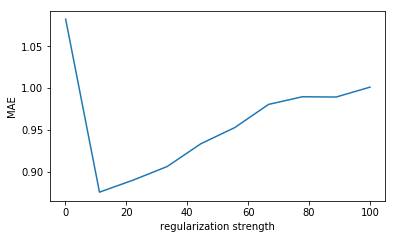

In [87]:
m = MLPRegressor(hidden_layer_sizes=[20,10,5], alpha=0.01, max_iter=1000, 
                 solver='lbfgs', activation='relu')
show_param_dependency(m, X_train, Y_train, X_test, Y_test, param_name='alpha', loss_fun='MAE',
                      param_vals=linspace(0.1,100,10), x_label='regularization strength')

0| 7| 14| 21| 29| 36| 43| 50| 57| 64| 71| 79| 86| 93| 100| 
Min MAE = 0.8795 for max_iter=10


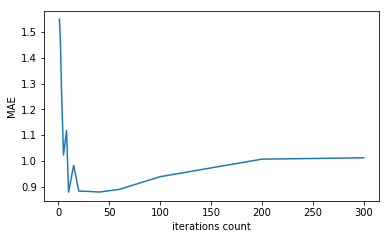

In [90]:
m = MLPRegressor(hidden_layer_sizes=[20,10,5], alpha=0.001, max_iter=1000, 
                 solver='lbfgs', activation='relu')
show_param_dependency(m, X_train, Y_train, X_test, Y_test, param_name='max_iter', loss_fun='MAE',
                      param_vals=[1,2,3,5,8,10,15,20,30,40,60,100,200,300], x_label='iterations count')

What else:
* SGD with different loss functions
* Bagging applied to any regression
* Model averaging
* Model averaging with weights (tune it on separate validation set, better cross-validation)
* Aggregation with arbitrary meta-model (tune it on separate validation set, better cross-validation)

* other boosting implementations: xgBoost, CatBoost, lightGBM
* Vowpal Wabbit - efficient implementation of linear models